In [1]:
from sympy import *
import numpy as np
init_printing()

# Para landmark

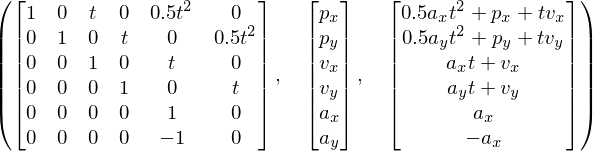

In [2]:
t = symbols('t')
p_x, v_x, a_x = symbols('p_x v_x a_x')
p_y, v_y, a_y = symbols('p_y v_y a_y')

x = Matrix([
        [p_x],
        [p_y],
        [v_x],
        [v_y],
        [a_x],
        [a_y]
           
    ])

x = Matrix([
        [p_x],
        [p_y],
        [v_x],
        [v_y],
        [a_x],
        [a_y]
           
    ])

A = Matrix([
        [1, 0, t, 0, 0.5*t**2, 0],
        [0, 1, 0, t, 0, 0.5*t**2],
        [0, 0, 1, 0, t, 0],
        [0, 0, 0, 1, 0, t],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, -1, 0]
    ])
A, x, A*x

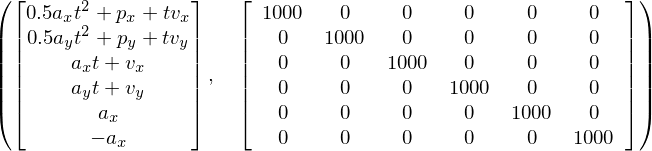

In [4]:
eq = A*x

covariance = Matrix(Identity(6)*1000)
R = Matrix(Identity(6)*0.1)
eq_cov = A*covariance*transpose(A) + R

eq, covariance

In [5]:
x = np.matrix([0, 0, 0, 0, 0, 0]).T # Valores iniciais
cov = Identity(6)*1e9 # Erros
x

matrix([[0],
        [0],
        [0],
        [0],
        [0],
        [0]])

## Para t = 0

In [6]:
x = np.matrix(
eq.subs([ # Substituindo valores
        [p_x, x[0]],
        [p_y, x[1]],
        [v_x, x[2]],
        [v_y, x[3]],
        [a_x, x[4]],
        [a_y, x[5]],
        
        [t, 0],
        
    ])[:], dtype=float).T
x

matrix([[ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.]])

In [7]:
V_x = v_x + R_p*sin(theta)*omegar

NameError: name 'R_p' is not defined

In [ ]:
V_y = v_y + R_p*sym.cos(theta)*omegar

In [ ]:

A_x = R_p*omegar

# Para objetos

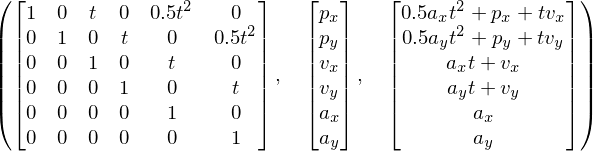

In [8]:
t = symbols('t')
p_x, v_x, a_x = symbols('p_x v_x a_x')
p_y, v_y, a_y = symbols('p_y v_y a_y')
x = Matrix([
        [p_x],
        [p_y],
        [v_x],
        [v_y],
        [a_x],
        [a_y]
           
    ])
A_t = Matrix([
        [1, 0, t, 0, 0.5*t**2, 0],
        [0, 1, 0, t, 0, 0.5*t**2],
        [0, 0, 1, 0, t, 0],
        [0, 0, 0, 1, 0, t],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1]
    ])
A_t, x, A_t*x

In [11]:
u_t = Matrix([
    [t],
    [t],
    [t]
])
u_t

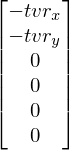

In [17]:
R_p, R_v, R_a = symbols("R_p R_v R_a")
vr_x, vr_y, omegar = symbols("vr_x, vr_y, \\omega\ r")

# Matrix([
#     -vr_x*t,
#     -vr_y*t,
#     0,
#     0,
#     0,
#     0,
# ])

Matrix([
    omegar*t,
    -vr_y*t,
    0,
    0,
    0,
    0,
])

# # vr_x = 0
# # vr_y = 0
# # R_p = (x[0]**2 + x[1]**2)**0.5
# # R_v = (x[2]**2 + x[3]**2)**0.5
# # R_a = (x[4]**2 + x[5]**2)**0.5
# # omegar = rad(90)
# B_t = Matrix([
#     [0, 0, 0],
#     [0, 0, 0],
#     [0, 0, 0],    
#     [0, 0, 0],
#     [0, 0, 0],
#     [0, 0, 0],
# ])
# # x, (x+B_t*u_t).subs([[p_x, sqrt(2)], [p_y, sqrt(2)], [v_x, 2], [v_y, 0], [a_x, 2], [a_y, 0], [t, 1]]) # sqrt(2)
# B_t, u_t, B_t*u_t

In [ ]:
eq = A_t*x + B_t*u_t
eq

In [ ]:
# eq = eq.subs([[f_vr_x, 0], [f_vr_y, 0], [f_omegar, 0]]) # Sem movimentos do robô
eq = eq.subs(t, 1) # delta de tempo 1s
eq = eq.subs([[omegar, pi/2]]) # Velocidade angular do robo
eq = eq.subs([[vr_x, 0], [vr_y, 0]]) # Velocidade em x e y do robo

eq = eq.subs([[p_x, 0], [p_y, 0]]) # Posição incial objeto 0, 0
eq = eq.subs([[v_x, 1], [v_y, 0]]) # velocidade incial objeto 1, 1
eq = eq.subs([[a_x, 1], [a_y, 0]]) # aceleração incial objeto 1, 1
eq

In [ ]:
eq = A_t*x + B_t*u_t
eq = eq.subs([[f_vr_x, 1], [f_vr_y, 1], [f_omegar, 1]]) # Com movimentos do robô
eq = eq.subs([[vr_x, 0], [vr_y, 1], [omegar, rad(180)]]) # Velocidade robô
eq = eq.subs(t, 1) # delta de tempo 1s
eq = eq.subs(R_p, (p_x**2 + p_y**2)**0.5) # Calculando R
eq = eq.subs([[p_x, 2], [p_y, 0]]) # Posição incial objeto 2, 0
eq = eq.subs([[v_x, 0], [v_y, 0]]) # velocidade incial objeto 0, 0
eq = eq.subs([[a_x, 0], [a_y, 0]]) # velocidade incial objeto 0, 0
eq

In [ ]:
eq = A_t*x + B_t*u_t
eq

## Atualização

In [ ]:
z_p_x, z_p_y = symbols('z_{p_{x}} z_{p_{y}}')
z = Matrix([
        [z_p_x],
        [z_p_y]
    ])
z

In [ ]:
C_t = Matrix([
        [1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0]
    ])
C_t

In [ ]:
import numpy as np
Sigma = symbols('\\Sigma_t')
Sigma = Matrix(np.identity(6) * 1.0/1e-99)
Sigma